In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Pre Processing Data

In [7]:
data = pd.read_csv("BSE_30_Data.csv")
data_pivot = data.pivot_table(index=['Symbol', 'Date'] )
df = data_pivot.loc['ADANIPORTS']
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2008-05-06,134.313477,151.149994,153.570007,147.820007,150.000000,1782030.0
2008-05-07,136.232864,153.309998,154.460007,150.240005,152.000000,1180015.0
2008-05-08,138.525497,155.889999,156.759995,150.199997,152.199997,1856245.0
2008-05-09,139.085312,156.520004,160.600006,154.210007,155.000000,3251375.0
2008-05-12,144.399170,162.500000,163.479996,151.000000,156.000000,5031635.0
...,...,...,...,...,...,...
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0
2018-05-02,399.899994,399.899994,411.000000,396.600006,407.100006,119475.0


## Pairplot

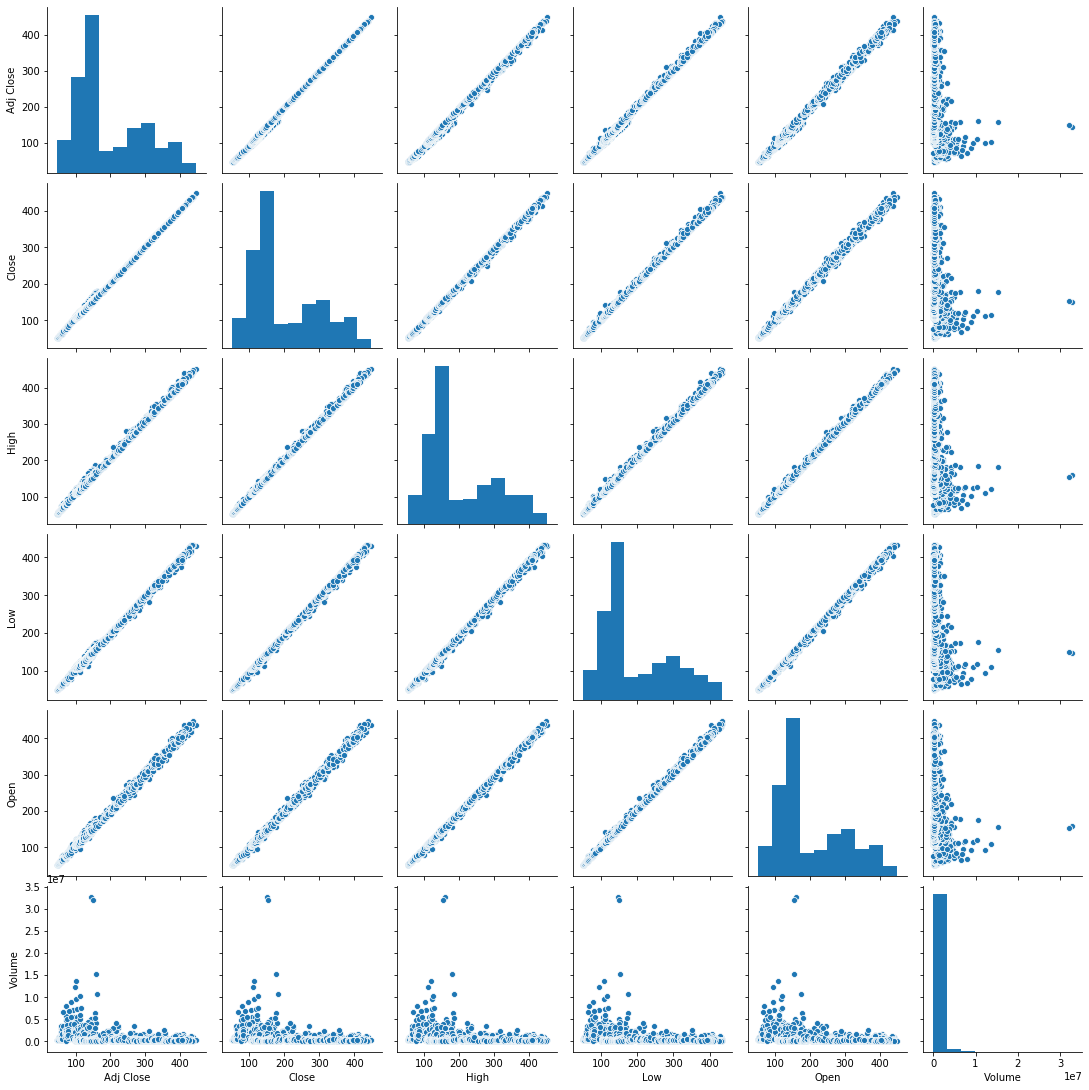

In [8]:
sns.pairplot(df)

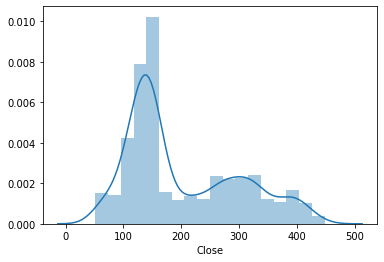

In [9]:
sns.distplot(df['Close'])

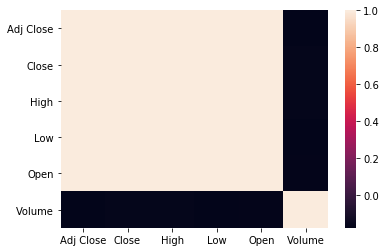

In [10]:
sns.heatmap(df.corr())

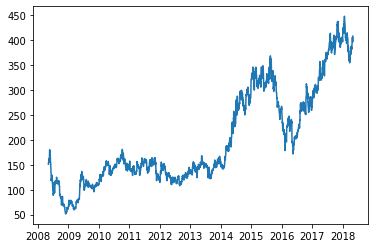

In [11]:
plt.plot(df['Close'])
plt.show()

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [16]:
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

In [14]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# print the intercept
print(lm.intercept_)

2.5675453122406964


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Adj Close,4.106764e-01
High,4.537194e-01
Low,4.293384e-01
Open,-3.002185e-01
Volume,2.955222e-07


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [25]:
predictions = lm.predict(X_test)

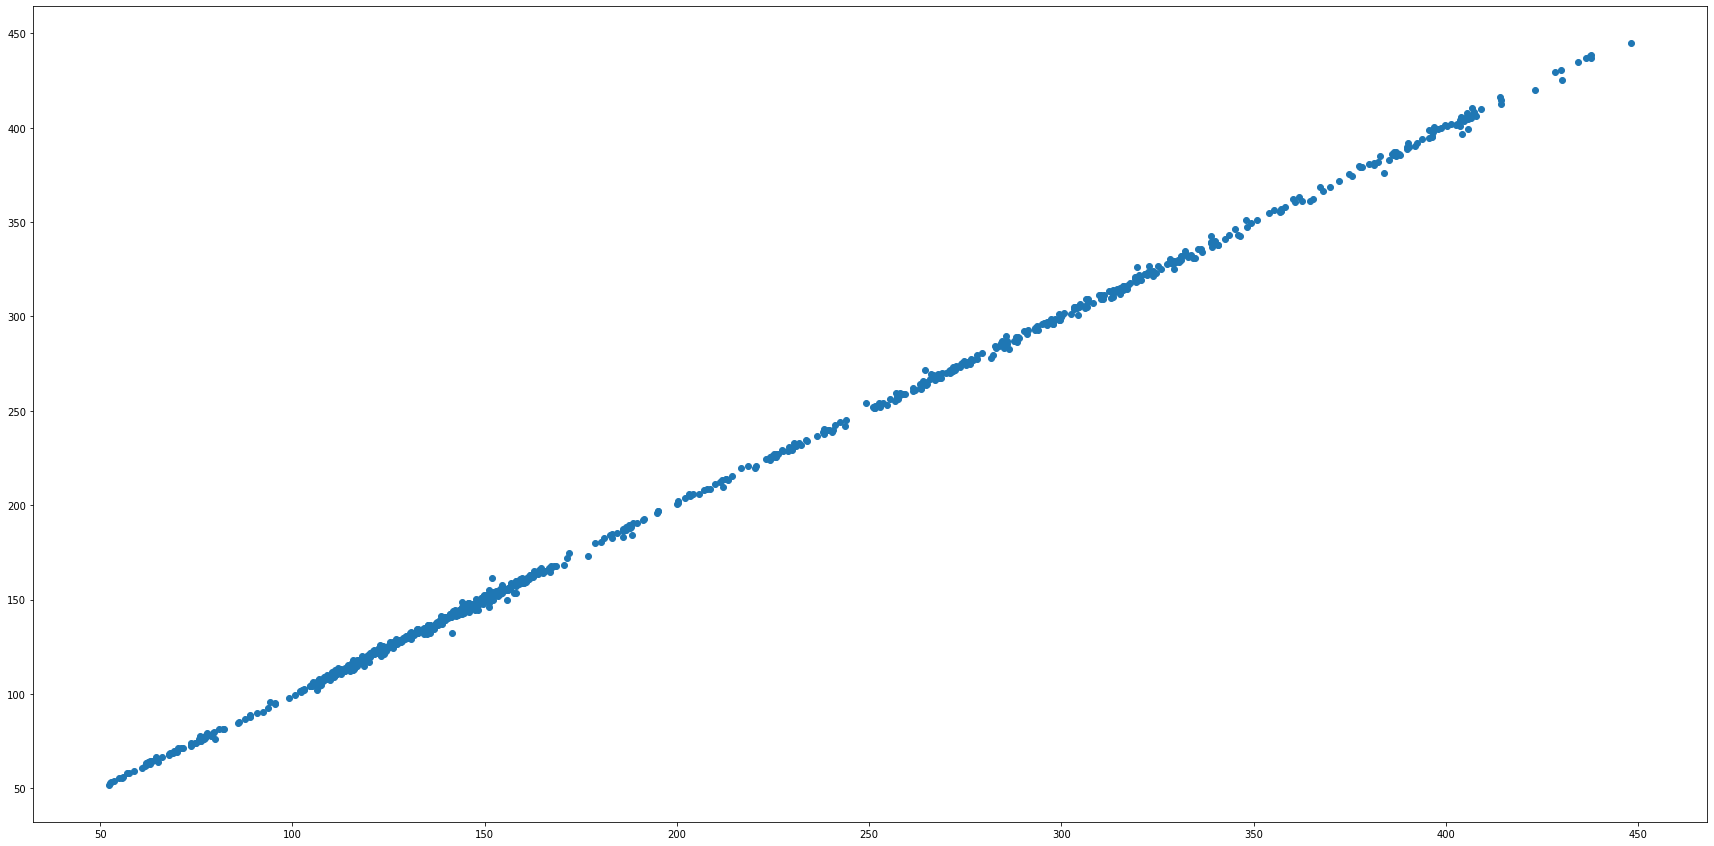

In [27]:
plt.figure(figsize=(30,15))
plt.scatter(y_test,predictions)

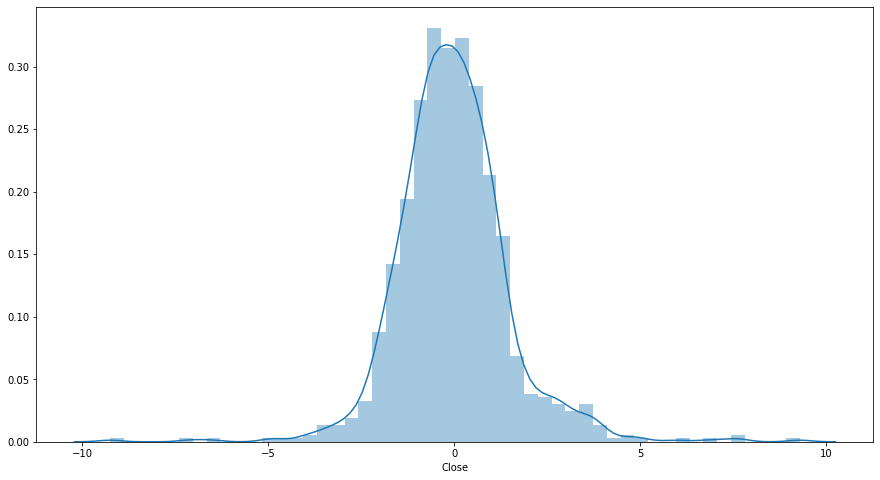

In [31]:
plt.figure(figsize=(15,8))
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0675137099018326
MSE: 2.2335980992060604
RMSE: 1.4945226994616243
